In [11]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === Load and preprocess dataset ===
df = pd.read_excel("default of credit card clients.xls", skiprows=1)
df.rename(columns={"default payment next month": "target"}, inplace=True)
df.drop(columns=['ID'], inplace=True, errors='ignore')

df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

X = df.drop(columns=['target']).values.astype(np.float32)
y = df['target'].astype(int).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# === Build MLP model ===
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Train model with early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# === Evaluate on test set ===
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📈 F1 Score:", f1_score(y_test, y_pred))
print("🏆 ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7925 - loss: 0.5131 - val_accuracy: 0.8131 - val_loss: 0.4601
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4530 - val_accuracy: 0.8133 - val_loss: 0.4560
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4306 - val_accuracy: 0.8125 - val_loss: 0.4528
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8219 - loss: 0.4340 - val_accuracy: 0.8135 - val_loss: 0.4524
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.4343 - val_accuracy: 0.8131 - val_loss: 0.4469
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8191 - loss: 0.4312 - val_accuracy: 0.8150 - val_loss: 0.4524
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.4277 - val_accuracy: 0.8152 - val_loss: 0.4479
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8238 - loss: 0.4284 - val_accuracy: 0.

In [12]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📈 F1 Score:", f1_score(y_test, y_pred))
print("🏆 ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
✅ Accuracy: 0.8181666666666667
📈 F1 Score: 0.47064531780688984
🏆 ROC AUC: 0.7677956759404948

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Feature names:", feature_names)


X_train shape: (24000, 23)
X_test shape: (6000, 23)
Feature names: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [14]:
# After preprocessing
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

# 👇 ADD THIS LINE to get feature names
feature_names = df.drop(columns=['target']).columns.tolist()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=['Tensor(shape=(100, 23))']
  warnings.warn(msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=['Tensor(shape=(200, 23))']
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

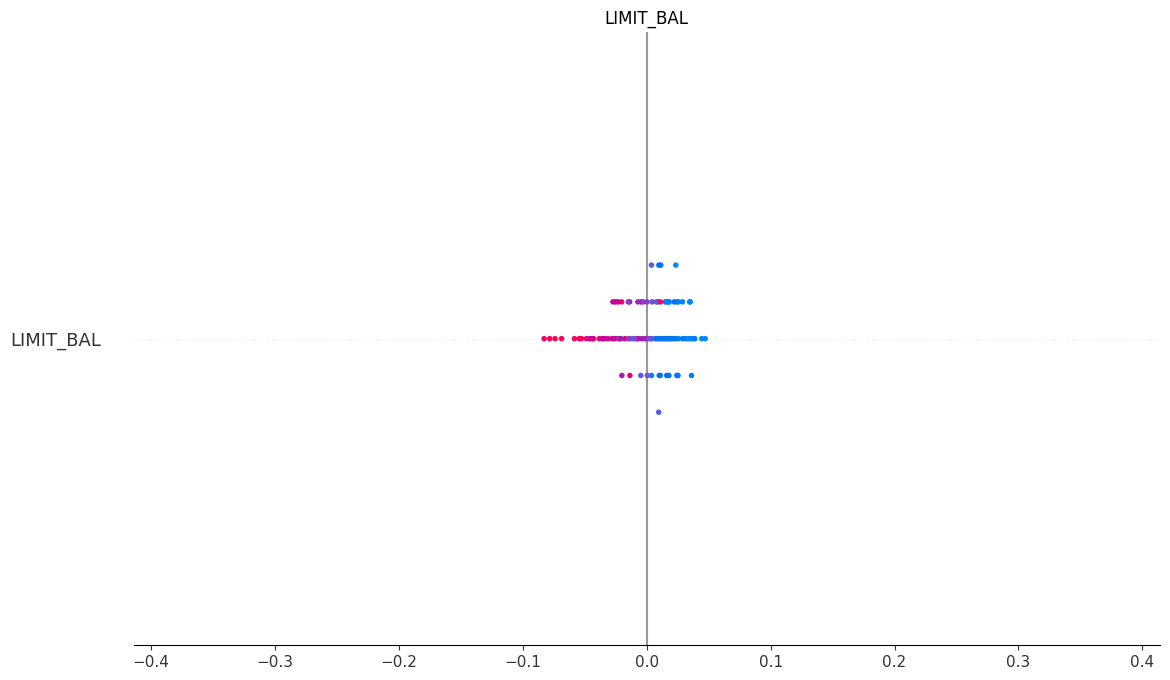

In [15]:
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test[:100])

# === SHAP Summary Plot ===
shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names)